<a href="https://colab.research.google.com/github/bregsiaju/cnn-digit-recognition/blob/main/Pengenalan_Pola_FP_CNN_(MNIST_Digit_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Referensi Video Tutorial:**

1.   https://www.youtube.com/watch?v=BfCPxoYCgo0&ab_channel=AndreasZinonos
2.   https://www.youtube.com/watch?v=u3FLVbNn9Os&ab_channel=DeepLearning_by_PhDScholar



## Imports

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

## Data
Load and preprocess the dataset

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualize Examples

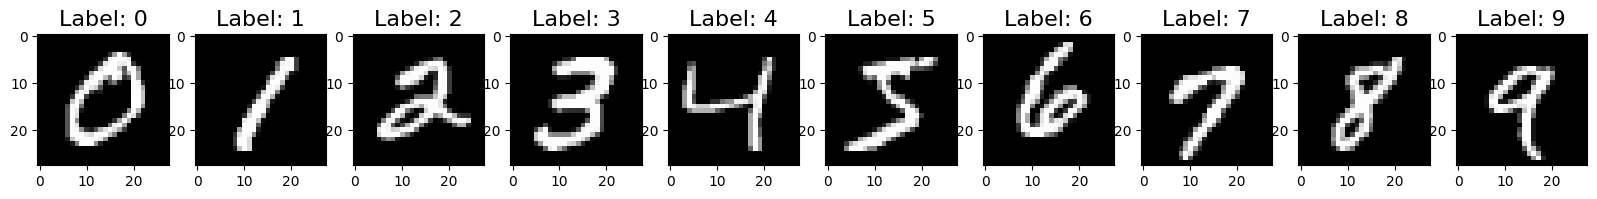

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [ ]:
# encode labels
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
# decode labels as index
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Prepare Data

In [ ]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


## Build the CNN Model

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Model

In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 5s 24ms/step - loss: 0.5932 - accuracy: 0.8274
Epoch 2/10
118/118 [==============================] - 3s 23ms/step - loss: 0.2138 - accuracy: 0.9382
Epoch 3/10
118/118 [==============================] - 3s 25ms/step - loss: 0.1593 - accuracy: 0.9541
Epoch 4/10
118/118 [==============================] - 3s 23ms/step - loss: 0.1267 - accuracy: 0.9626
Epoch 5/10
118/118 [==============================] - 3s 28ms/step - loss: 0.1050 - accuracy: 0.9693
Epoch 6/10
118/118 [==============================] - 3s 24ms/step - loss: 0.0883 - accuracy: 0.9740
Epoch 7/10
118/118 [==============================] - 3s 23ms/step - loss: 0.0756 - accuracy: 0.9776
Epoch 8/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 9/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0578 - accuracy: 0.9824
Epoch 10/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0504 - accura

## Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9789
Test Loss: 0.06942948698997498, Test Accuracy: 0.9789000153541565


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.9051665e-06 5.0739050e-07 7.9172933e-05 ... 9.9914134e-01
  2.2536747e-06 5.0683535e-05]
 [5.0589290e-07 2.0311566e-04 9.9974132e-01 ... 5.1513305e-10
  3.1861873e-05 5.3066634e-11]
 [6.3674538e-06 9.9802279e-01 1.3447780e-04 ... 8.9860044e-04
  5.4502819e-04 2.9154982e-05]
 ...
 [3.3053791e-09 3.1283019e-08 9.9970088e-10 ... 6.3104130e-06
  3.3778963e-07 2.0900376e-05]
 [1.0873528e-09 1.7798957e-10 7.3712937e-12 ... 2.8416652e-08
  4.8982097e-06 1.8128775e-09]
 [8.6938641e-08 3.1447580e-09 8.4532772e-09 ... 4.5511457e-13
  3.6868492e-08 2.4331034e-10]]
[7 2 1 ... 4 5 6]


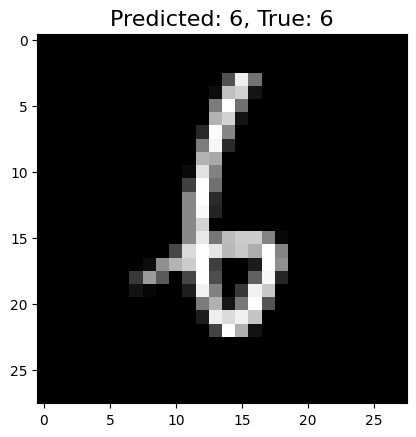

In [ ]:
# Test Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

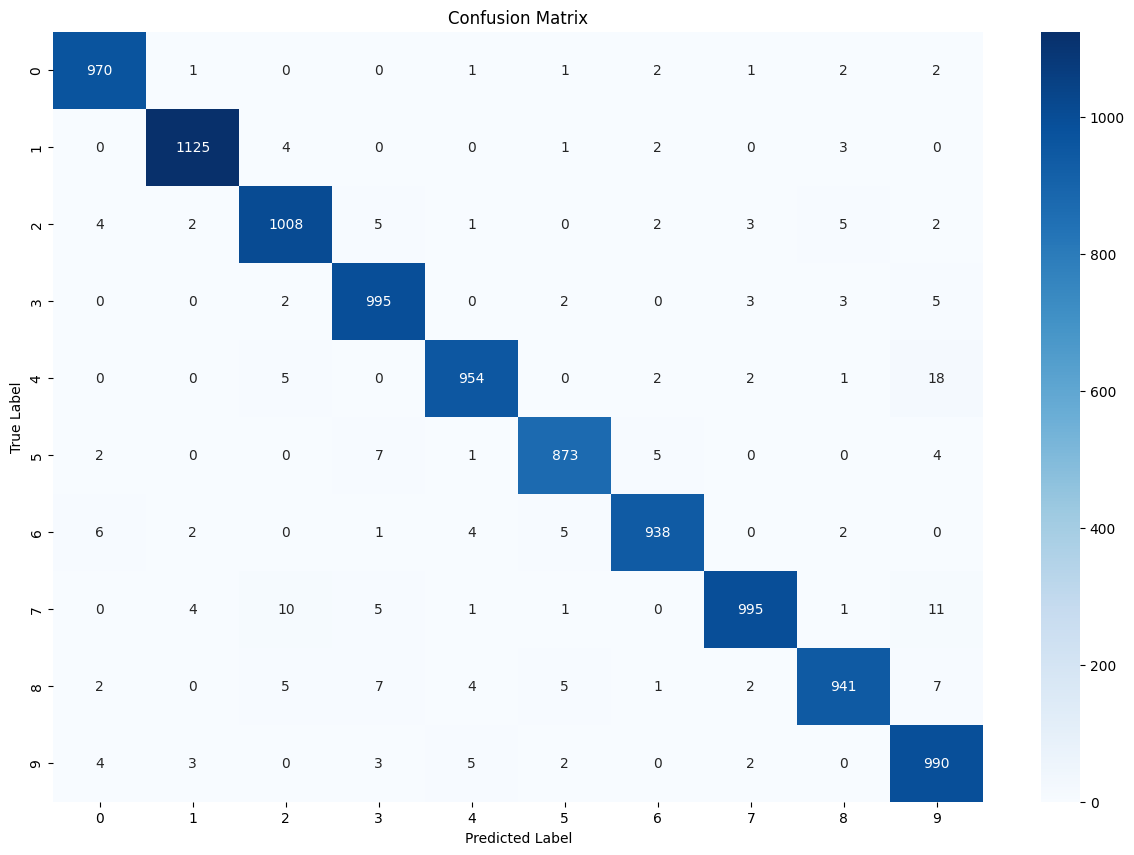

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

## Investigate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences (5 lastest)
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

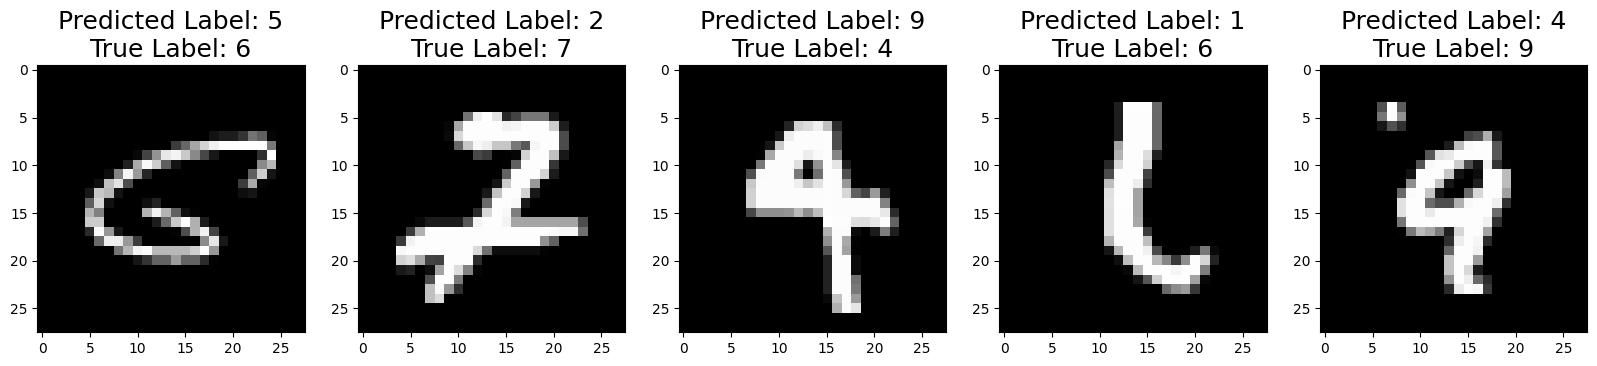

In [ ]:
# Show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(20, 20))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Predicted Label: {}\nTrue Label: {}'.format(y_p, y_t), fontsize=16)

In [ ]:
# Build the CNN Model

model = Sequential()

# Layer-1 and Layer-2 (Convolution Relu and Max Pooling)
model.add(Conv2D(32, (5, 5), input_shape=(input_shape), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer-3 and Layer-4 (Convolution Relu and Max Pooling)
model.add(Conv2D(32, (5, 5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer-5 (Convolution acts as Fully Connected and Flattened)
model.add(Conv2D(64, (4, 4), padding='valid'))
model.add(Activation('relu'))

# Layer-6 (Fully Connected + Relu)
model.add(Conv2D(256, (1, 1), padding='valid'))
model.add(Activation('relu'))

# Layer-7 (Fully Connected + Softmax)
model.add(Conv2D(10, (1, 1), padding='valid'))
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()